# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#Read-the-data" data-toc-modified-id="Read-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read the data</a></div><div class="lev1 toc-item"><a href="#Ellipticity-of-m-and-m9" data-toc-modified-id="Ellipticity-of-m-and-m9-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ellipticity of m and m9</a></div><div class="lev1 toc-item"><a href="#Script" data-toc-modified-id="Script-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Script</a></div><div class="lev1 toc-item"><a href="#Combine-all-mono-files" data-toc-modified-id="Combine-all-mono-files-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Combine all mono files</a></div><div class="lev1 toc-item"><a href="#Ellipticity-of-mono" data-toc-modified-id="Ellipticity-of-mono-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ellipticity of mono</a></div>

# Introduction
Date: Nov 13, 2019

```
DMSTACK input:  m.fits m9.fits l.fits l9.fits
DMSTACK output: m.csv  m9.csv  l.csv  l9.csv  (90 flags and 67 params)

dmstack output has nans and so many columns.
First I select few columns, and remove nans from them.
I also do some filtering such as filter psf candidates.

clean output: m.txt m9.txt l.txt l9.txt
combine four txt using IMCAT mergecats: final0.cat

I have 100 final.cat files, combine them
final_text.txt which has columns like gm[0], gm[1].


```

Here, I will look at ellipticity distribution in m and m9 files.

# Imports

In [1]:
import json, os,sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

pd.set_option('display.max_columns',200)

import matplotlib.pyplot as plt
%matplotlib inline

# Read the data

In [3]:
dict_flags = json.load( open('../data/dict_flags.json'))
# dict_flags

dict_flags['0']

'calib_detected'

In [8]:
!ls ../data/dmstack_txt | head

src_lsst90_z1.5_000.txt
src_lsst90_z1.5_001.txt
src_lsst90_z1.5_002.txt
src_lsst90_z1.5_003.txt
src_lsst90_z1.5_004.txt
src_lsst90_z1.5_005.txt
src_lsst90_z1.5_006.txt
src_lsst90_z1.5_007.txt
src_lsst90_z1.5_008.txt
src_lsst90_z1.5_009.txt


In [22]:
%%bash
cat ../data/dmstack_txt_headers.txt

file_number  id  base_SdssCentroid_x  base_SdssCentroid_y  base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  ext_shapeHSM_HsmShapeRegauss_e1  ext_shapeHSM_HsmShapeRegauss_e2  ellip  base_SdssShape_flux  radius

In [33]:
%%bash

head -2 ../data/dmstack_txt/src_lsst_mono_z1.5_000.txt

# file_number  id  base_SdssCentroid_x  base_SdssCentroid_y  base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  ext_shapeHSM_HsmShapeRegauss_e1  ext_shapeHSM_HsmShapeRegauss_e2  ellip  base_SdssShape_flux  radius
0.000000000000000000e+00	4.300000000000000000e+01	2.075329400000000078e+03	5.073499999999999943e+01	1.003000000000000003e-01	9.660000000000000531e-02	4.208999999999999964e-01	-6.853000000000000203e-01	8.042343563912200954e-01	6.997765999999999622e+03	5.136519508215429575e+00


In [37]:
'file_number  id  base_SdssCentroid_x  base_SdssCentroid_y  base_SdssCentroid_xSigma  base_SdssCentroid_ySigma  ext_shapeHSM_HsmShapeRegauss_e1  ext_shapeHSM_HsmShapeRegauss_e2  ellip  base_SdssShape_flux  radius'.split()

['file_number',
 'id',
 'base_SdssCentroid_x',
 'base_SdssCentroid_y',
 'base_SdssCentroid_xSigma',
 'base_SdssCentroid_ySigma',
 'ext_shapeHSM_HsmShapeRegauss_e1',
 'ext_shapeHSM_HsmShapeRegauss_e2',
 'ellip',
 'base_SdssShape_flux',
 'radius']

In [24]:
names = ['file_number', 'id', 'base_SdssCentroid_x', 'base_SdssCentroid_y',
         'base_SdssCentroid_xSigma', 'base_SdssCentroid_ySigma',
         'ext_shapeHSM_HsmShapeRegauss_e1', 'ext_shapeHSM_HsmShapeRegauss_e2',
         'ellip', 'base_SdssShape_flux', 'radius']

In [35]:
dfm = pd.read_csv('../data/dmstack_txt/src_lsst_mono_z1.5_000.txt',
                  sep=r'\t',names=names,header=None,skiprows=1,engine='python')

dfm.head(2)

,file_number,id,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xSigma,base_SdssCentroid_ySigma,ext_shapeHSM_HsmShapeRegauss_e1,ext_shapeHSM_HsmShapeRegauss_e2,ellip,base_SdssShape_flux,radius
0,0.0,43.0,2075.3294,50.7350,0.1003,0.0966,0.4209,-0.6853,0.804234,6997.7660,5.136520
1,0.0,50.0,2915.3262,60.5586,0.0654,0.1069,-1.0058,0.1430,1.015915,10343.2779,4.488783


In [36]:
dfm9 = pd.read_csv('../data/dmstack_txt/src_lsst_mono90_z1.5_000.txt',
                  sep=r'\t',names=names,header=None,skiprows=1,engine='python')

dfm9.head(2)

,file_number,id,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xSigma,base_SdssCentroid_ySigma,ext_shapeHSM_HsmShapeRegauss_e1,ext_shapeHSM_HsmShapeRegauss_e2,ellip,base_SdssShape_flux,radius
0,0.0,43.0,2076.9302,49.6888,0.2540,0.2226,0.4840,-0.7114,0.860434,7295.1804,4.981713
1,0.0,44.0,468.7871,52.8991,0.0582,0.0641,-0.2109,-1.4296,1.445073,6207.0956,3.548051


# Ellipticity of m and m9

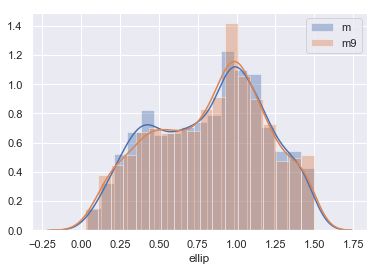

In [64]:
sns.distplot(dfm['ellip'],label='m')
sns.distplot(dfm9['ellip'], label='m9')

plt.legend()

# Script

In [77]:
import json, os,sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('ggplot')

import matplotlib.pyplot as plt

names = ['file_number', 'id', 'base_SdssCentroid_x', 'base_SdssCentroid_y',
         'base_SdssCentroid_xSigma', 'base_SdssCentroid_ySigma',
         'ext_shapeHSM_HsmShapeRegauss_e1', 'ext_shapeHSM_HsmShapeRegauss_e2',
         'ellip', 'base_SdssShape_flux', 'radius']

def plot_ellip_hist(num):
    dfm = pd.read_csv('../data/dmstack_txt/src_lsst_mono_z1.5_{:03d}.txt'.format(num),
                      sep=r'\t',names=names,header=None,skiprows=1,engine='python')


    dfm9 = pd.read_csv('../data/dmstack_txt/src_lsst_mono90_z1.5_{:03d}.txt'.format(num),
                      sep=r'\t',names=names,header=None,skiprows=1,engine='python')

    plt.figure(figsize=(12,8))
    sns.distplot(dfm['ellip'],label='m')
    sns.distplot(dfm9['ellip'], label='m9')
    plt.legend()
    
    title = 'lsst_mono and lsst_mono90: {:03d}'.format(num)
    plt.title(title)

    plt.savefig('results/file_{}.png'.format(num))
    plt.close()
    

for num in range(99):
    plot_ellip_hist(num)

# Combine all mono files

In [82]:
# df_mono90 = pd.DataFrame(columns=names)


# for num in range(99):
#     dx = pd.read_csv('../data/dmstack_txt/src_lsst_mono90_z1.5_{:03d}.txt'.format(num),
#                   sep=r'\t',names=names,header=None,skiprows=1,engine='python')
    
#     df_mono90 = df_mono90.append(dx)

# df_mono90.to_csv('../data/dmstack_txt_mono90_all.csv')

# Ellipticity of mono

In [86]:
df_mono = pd.read_csv('../data/dmstack_txt_mono_all.csv')

In [87]:
plt.figure(figsize=(12,8))
sns.distplot(df_mono['ellip'],label='mono')

plt.legend()

title = 'lsst_mono ellpiticity'
plt.title(title)

plt.savefig('results/ellip_m
plt.close()